In [2]:
import xarray
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from netCDF4 import Dataset
import netCDF4 
import datetime
import numpy as np
import netCDF4 as netcdf
import pandas as pd
import octant.roms as roms
import matplotlib.colors as colors
import octant.roms
from scipy.signal import savgol_filter



In [ ]:
# ncfiles_all = ['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
#        '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
#        '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
#        '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
#        '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
#        '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
#        '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
#        '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
#        '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
#        '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
#        '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
#        '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
#        '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
#        '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
#        '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
#        '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
#        '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
#        '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
#        '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
#        '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
#        '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
#        '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
#        '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
#        '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
#        '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
#        '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
#        '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
#        '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
#        '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
#        '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
#        '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
#        '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
#        '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
#        '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
#        '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
#        '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
#        '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
#        '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
#        '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
#        '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
#        '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
#        '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
#        '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
#        '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
#        '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
#        '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
#        '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
#        '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
#        '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
#        '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
#        '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
#        '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
#        '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
#        '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
#        '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
#        '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
#        '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
#        '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
#        '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
#        '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
#        '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
#        '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
#        '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
#        '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
#        '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
#        '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
#        '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
#        '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
#        '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
#        '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
#        '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
#        '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc',]

# ds = xarray.open_mfdataset(ncfiles_all)
nc = netCDF4.MFDataset(['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
       '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
       '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
       '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
       '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
       '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
       '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
       '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
       '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
       '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
       '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
       '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
       '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
       '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
       '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
       '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
       '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
       '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
       '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
       '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
       '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
       '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
       '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
       '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
       '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
       '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
       '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
       '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
       '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
       '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
       '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
       '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
       '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
       '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
       '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
       '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
       '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
       '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
       '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
       '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
       '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
       '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
       '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
       '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
       '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
       '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
       '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
       '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
       '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
       '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
       '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
       '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
       '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
       '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
       '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
       '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
       '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
       '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
       '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
       '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
       '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
       '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
       '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
       '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
       '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
       '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
       '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
       '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
       '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
       '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
       '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
       '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc'])
ncgrd = Dataset('/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc')
Cs_w = ncgrd['Cs_w'][:]
Cs_r = ncgrd['Cs_r'][:]
sw = ncgrd['s_w'][:]
sr = ncgrd['s_rho'][:]
h = ncgrd['h'][:,:]
hc = 0.5
N = 20



In [ ]:
dfeast = pd.read_csv('Salinity_Data.csv', index_col=0, parse_dates=[0])
dfeast = dfeast['CopanoEast']
dfeast = dfeast.replace(0,dfeast.mean())
dfeast = dfeast['2010-1-1':'2015-12-1']
dfeast = dfeast[~dfeast.index.duplicated()] 
dfeast = dfeast.resample('120min').interpolate()
dfeast = dfeast.fillna(dfeast.mean())

dfsal = pd.read_csv('Salinity_Data.csv', index_col=0, parse_dates=[0])
dfsal = dfsal['MARABWQ']
dfsal = dfsal.replace(0,dfsal.mean())
dfsal = dfsal['2010-1-1':'2015-12-1']
dfsal = dfsal[~dfsal.index.duplicated()] 
dfsal = dfsal.resample('120min').interpolate()
dfsal = dfsal.fillna(dfsal.mean())

df_new = pd.DataFrame({'CopanoEast': dfeast, 'MARABWQ': dfsal})
df_new.to_csv('Normalized_Salinity1.csv')
# dfsal = dfsal.values.tolist()
len(dfsal)

In [ ]:
dfwest = pd.read_csv('MARCWWQ.csv', index_col=0, parse_dates=[0])
dfwest = dfwest['Sal']
dfwest = dfwest.replace(0,dfwest.mean())
dfwest = dfwest['2010-1-1':'2015-12-1']
dfwest = dfwest[~dfwest.index.duplicated()] 
dfwest = dfwest.resample('120min').interpolate()
dfwest = dfwest.fillna(dfwest.mean())

df_new = pd.DataFrame({'CopanoWest': dfwest,})
df_new.to_csv('MARCWWQ.csv')

In [ ]:
## SEE Eq. (3) on https://www.myroms.org/wiki/Vertical_S-coordinate
zw = h[np.newaxis,:,:]*(hc*sw[:,np.newaxis,np.newaxis] + h[np.newaxis,:,:]*\
                    Cs_w[:,np.newaxis,np.newaxis])/(hc+h[np.newaxis,:,:])
zr = h[np.newaxis,:,:]*(hc*sr[:,np.newaxis,np.newaxis] + h[np.newaxis,:,:]*\
                    Cs_r[:,np.newaxis,np.newaxis])/(hc+h[np.newaxis,:,:])
#Volume averaged salinity variance and time rate of change
# time = ds['ocean_time'][:10]
#print(time) 
salt_bar = []
salt_bari = []
# sigma = []
mask = nc['mask_rho']

dx = 1.0/nc['pm'][:] * mask
dy = 1.0/nc['pn'][:] * mask
# salt = []
salt = nc['salt']
zw = octant.roms.nc_depths(nc, 'w')
dz = np.diff(-zw, axis=0) * mask
volume = np.sum(dx * dy * dz)
volume
# for tidx in range(len(time)):
#     salt_bari = np.sum(salt * dx * dy * dz) / volume
#     salt_bar.append( salt_bari )
# salt_bar
# #     sigma = ((salt_bar/dfsal[:100]) )
# df_new = pd.DataFrame({'salt_bar': salt_bar})
# df_new.to_csv('Shit.csv')
# # df_new = pd.DataFrame({'salt_bar': salt_bar, 'sigma':sigma,'time':time})
# # df_new.set_index('time')
# # df_new.to_csv('Normalized_Salinity1.csv')

In [ ]:
df_new

In [ ]:
dfsalty = pd.read_csv('/home/dylan/Normalized_Salinity_New_Zw.csv', index_col=0, parse_dates=True)
df1 = pd.read_csv('/home/dylan/Forcing_Mechanisms/Total River Discharge Data Final.csv', index_col=0, parse_dates=True)

fig = plt.figure(figsize=(12,8),dpi=800)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)
ax = plt.subplot(3,1,1)
dfsalty['sigma'].plot(color = 'k')
# dfsalty['sigma1'].plot(color = 'b')
ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_xlim(['2010-1-5','2016-1-1'])
plt.title('Normalized Salinity ($\Sigma = S _{avg}/S _{in}$)')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(19)

ax2 = plt.subplot(3,1,2)
ax2.set_xlabel('')
dfsalty['salt_vavg'].plot(color = 'r',label = '$S _{avg}$')
dfsalty['avg'].plot(color = 'b',label = '$S _{in}$')
ax2.set_xlim(['2010-1-5','2016-1-1'])
ax2.set_yticks([10,20,30,40])
plt.title('$\Sigma$ Components')
ax2.legend(loc =8)
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.set_ylabel('g/kg')
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(19)

ax3 = plt.subplot(3,1,3)
df1['ComFlow']['2010-1-5':'2015-12-31'].plot(legend=[])
ax3.set_xlim(['2010-1-5','2016-1-1'])
ax3.set_xlabel('')
# ax3.set_xticklabels([])
ax3.set_ylabel(' ($m^{3}s^{-1}$)')
# ax3.set_xticks([2010,2011])
plt.title('River Discharge')
for item in ([ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
             ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(19)

plt.savefig('/home/dylan/Normalized_Salinity.png')


In [ ]:
df[-1900:]

In [ ]:
dfsalinity = pd.read_csv('/home/dylan/Salinity_Data.csv', index_col=0, parse_dates=True)

In [ ]:
# data=[]
# data = pd.read_csv('/home/dylan/Interpolated_Salinity.csv', index_col=0, parse_dates=True)
fig = plt.figure(figsize=(14,9),dpi=600)
fig.tight_layout()
# fig.subplots_adjust(hspace=.5)

ax = plt.subplot(3,1,1)
data['CopanoEast'].plot(color='k', label = 'Copano East')
data['CopanoWest'].plot(color = 'b', label = 'Copano West')
data['MARABWQ'].plot(color = 'r', label ='Aransas Bay')
ax.set_xlim(['2010-1-5','2016-1-1'])
# dfsalinity['MARSCWQ'].plot(color = 'b', label = 'MARSCWQ')
# dfsalinity['MARABWQ'].plot(color = 'r', label ='MARABWQ')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('g/kg')
ax.legend()
plt.title('Salinity')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(19)

ax2 = plt.subplot(3,1,2)
data['East_Mara'].plot(color = 'k', label = 'East/Aransas')
data['West_Mara'].plot(color = 'b', label = 'West/Aransas')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.set_xlim(['2010-1-5','2016-1-1'])
ax2.legend()
plt.title('Fractional Comparison')
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(19)

ax3 = plt.subplot(3,1,3)
data['East_West'].plot()
ax3.set_ylabel('g/kg')
ax3.set_xlim(['2010-1-5','2016-1-1'])
plt.title('East Minus West')
ax3.set_xlabel('')
for item in ([ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
             ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(19)



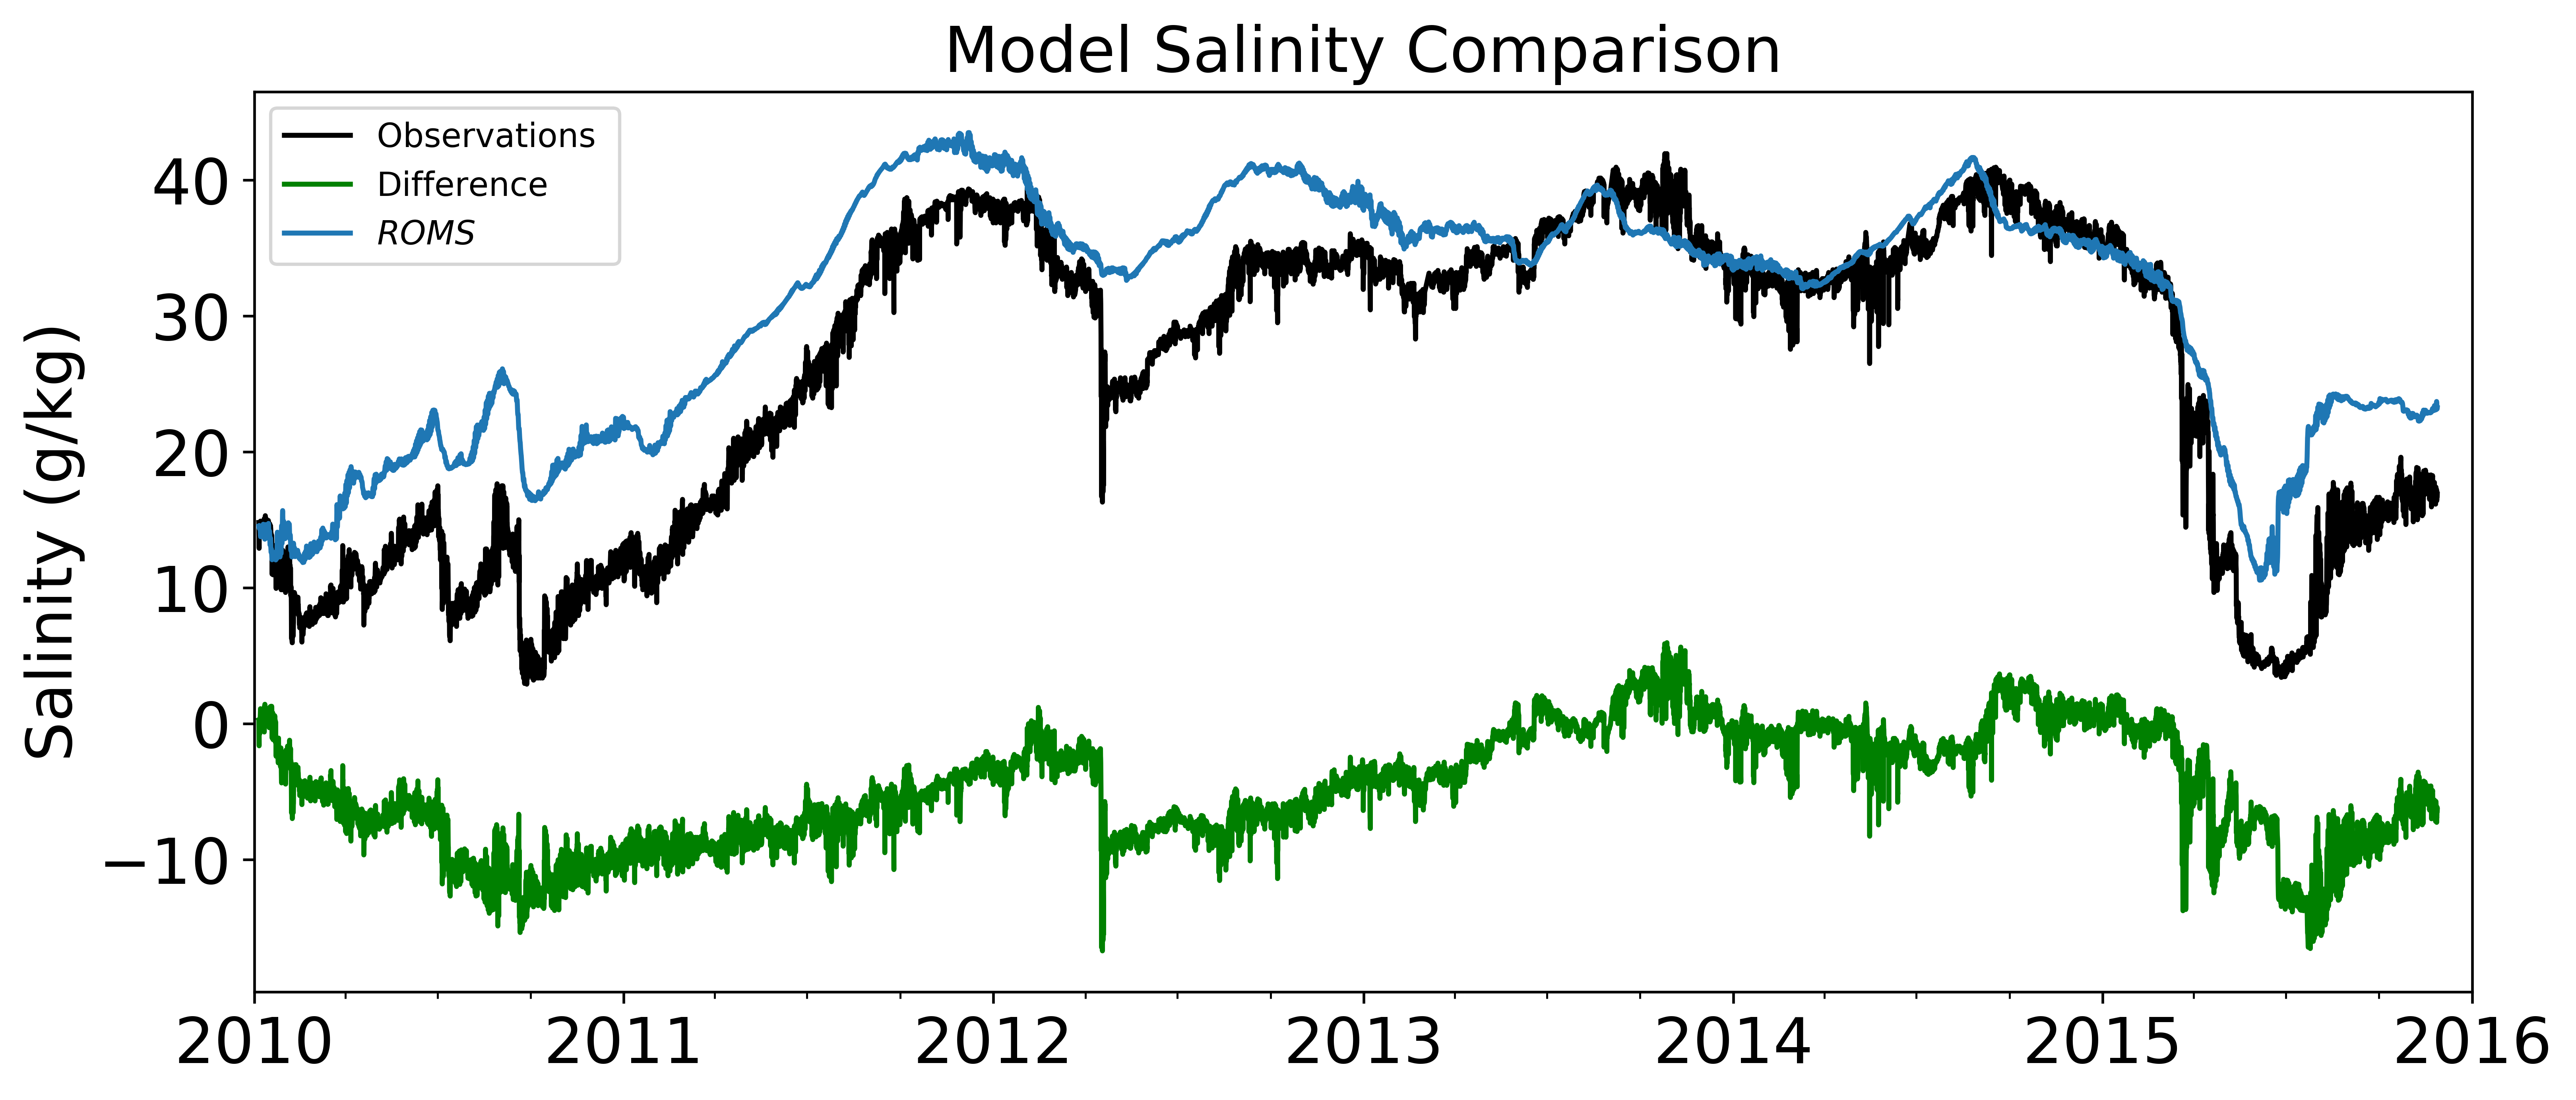

In [12]:
# data = pd.read_csv('/home/dylan/Interpolated_Salinity.csv', index_col=0, parse_dates=True)
# dfsalty = pd.read_csv('/home/dylan/Normalized_Salinity_New_Zw.csv', index_col=0, parse_dates=True)
# Averagesal = (1/2)*(data['CopanoEast']+data['CopanoWest'])
# Difference = Averagesal[:25826] -dfsalty['salt_vavg'][:25826] 

#Remove Bias
# N= 300
# Newsalt = dfsalty['salt_vavg'][:25826]+Difference
# sigma = (Newsalt/data['CopanoEast'][:25826])
# sigma.fillna(sigma.mean())
# sigma = np.array(sigma)
# m  = sigma.mean()
# sigma[sigma <= 0.01] = m
# sigma1 = savgol_filter(sigma,169,3)


# # Newsalt.plot(color = 'b')

# fig = plt.figure(figsize=(12,4),dpi=600)
# ax = plt.subplot(111)
# plt.plot(sigma,color = 'k',label = 'Unsmoothed')
# plt.plot(sigma1,color = 'b', label = 'Savgol Order 3 with 14 day window')
# ax.legend()
# # fig.tight_layout()
# # # fig.subplots_adjust(hspace=.5)
# plt.title("$\Sigma = S_{avg}/CopanoEast$")

fig = plt.figure(figsize=(12,5),dpi=600)
ax = plt.subplot(111)
# data['CopanoEast'].plot(color='k', label = 'Copano East').plot()
# plt.plot(Rollingavg)
# data['CopanoWest'].plot(color = 'b', label = 'Copano West')
Averagesal.plot(color='k', label = 'Observations ')
Difference.plot(color = 'g', label = 'Difference')
dfsalty['salt_vavg'][:25826].plot(label = '$ROMS$')
ax.set_xlim(['2010-1-1','2016-1-1'])
# dfsalinity['MARSCWQ'].plot(color = 'b', label = 'MARSCWQ')
# dfsalinity['MARABWQ'].plot(color = 'r', label ='MARABWQ')
ax.set_xlabel('')
# ax.set_xticklabels([])
ax.set_ylabel('Salinity (g/kg)')
ax.legend(loc =2)
plt.title('Model Salinity Comparison')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(19)

In [56]:
sigma.min()

0.5035971223021583

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5,1,'Estuarine Adjustment Time $\\tau$ ')

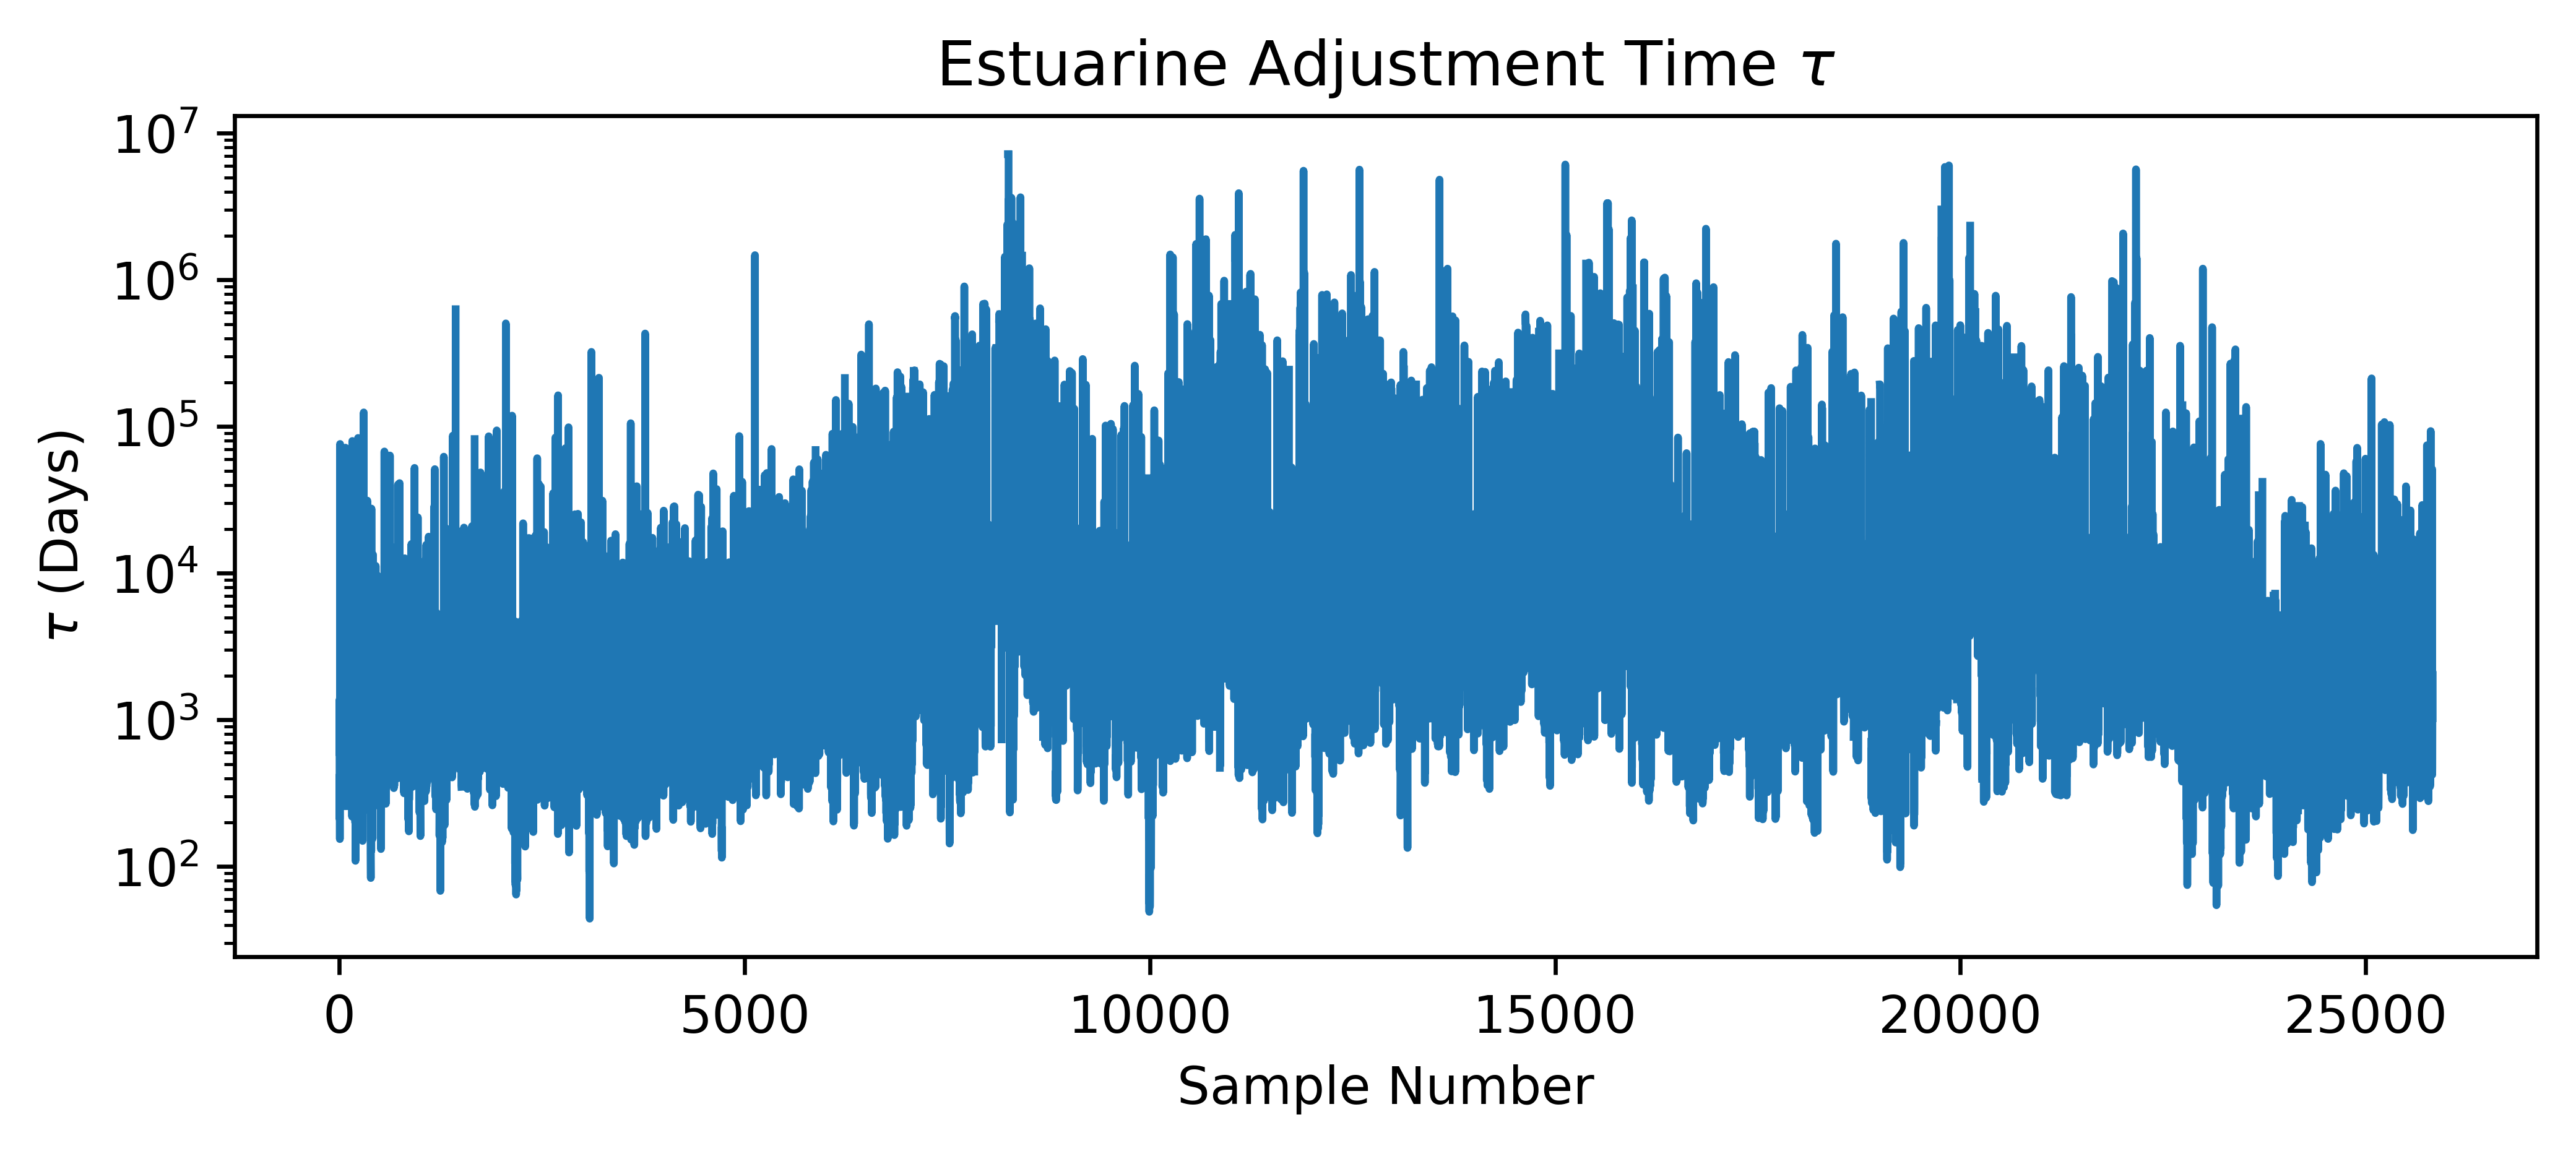

In [80]:

fig = plt.figure(figsize=(8,3),dpi=600)
dEdt = (1/12)*abs(np.gradient(sigma))
Tau = sigma * (1/dEdt)
avg  = Tau.mean()
Tau[Tau >= 10** 9] = avg
plt.semilogy(Tau)
plt.xlabel('Sample Number')
plt.ylabel(r'$\tau$ (Days)')
plt.title(r'Estuarine Adjustment Time $\tau$ ')

Text(0.5,1,'Normalized Stratification ')

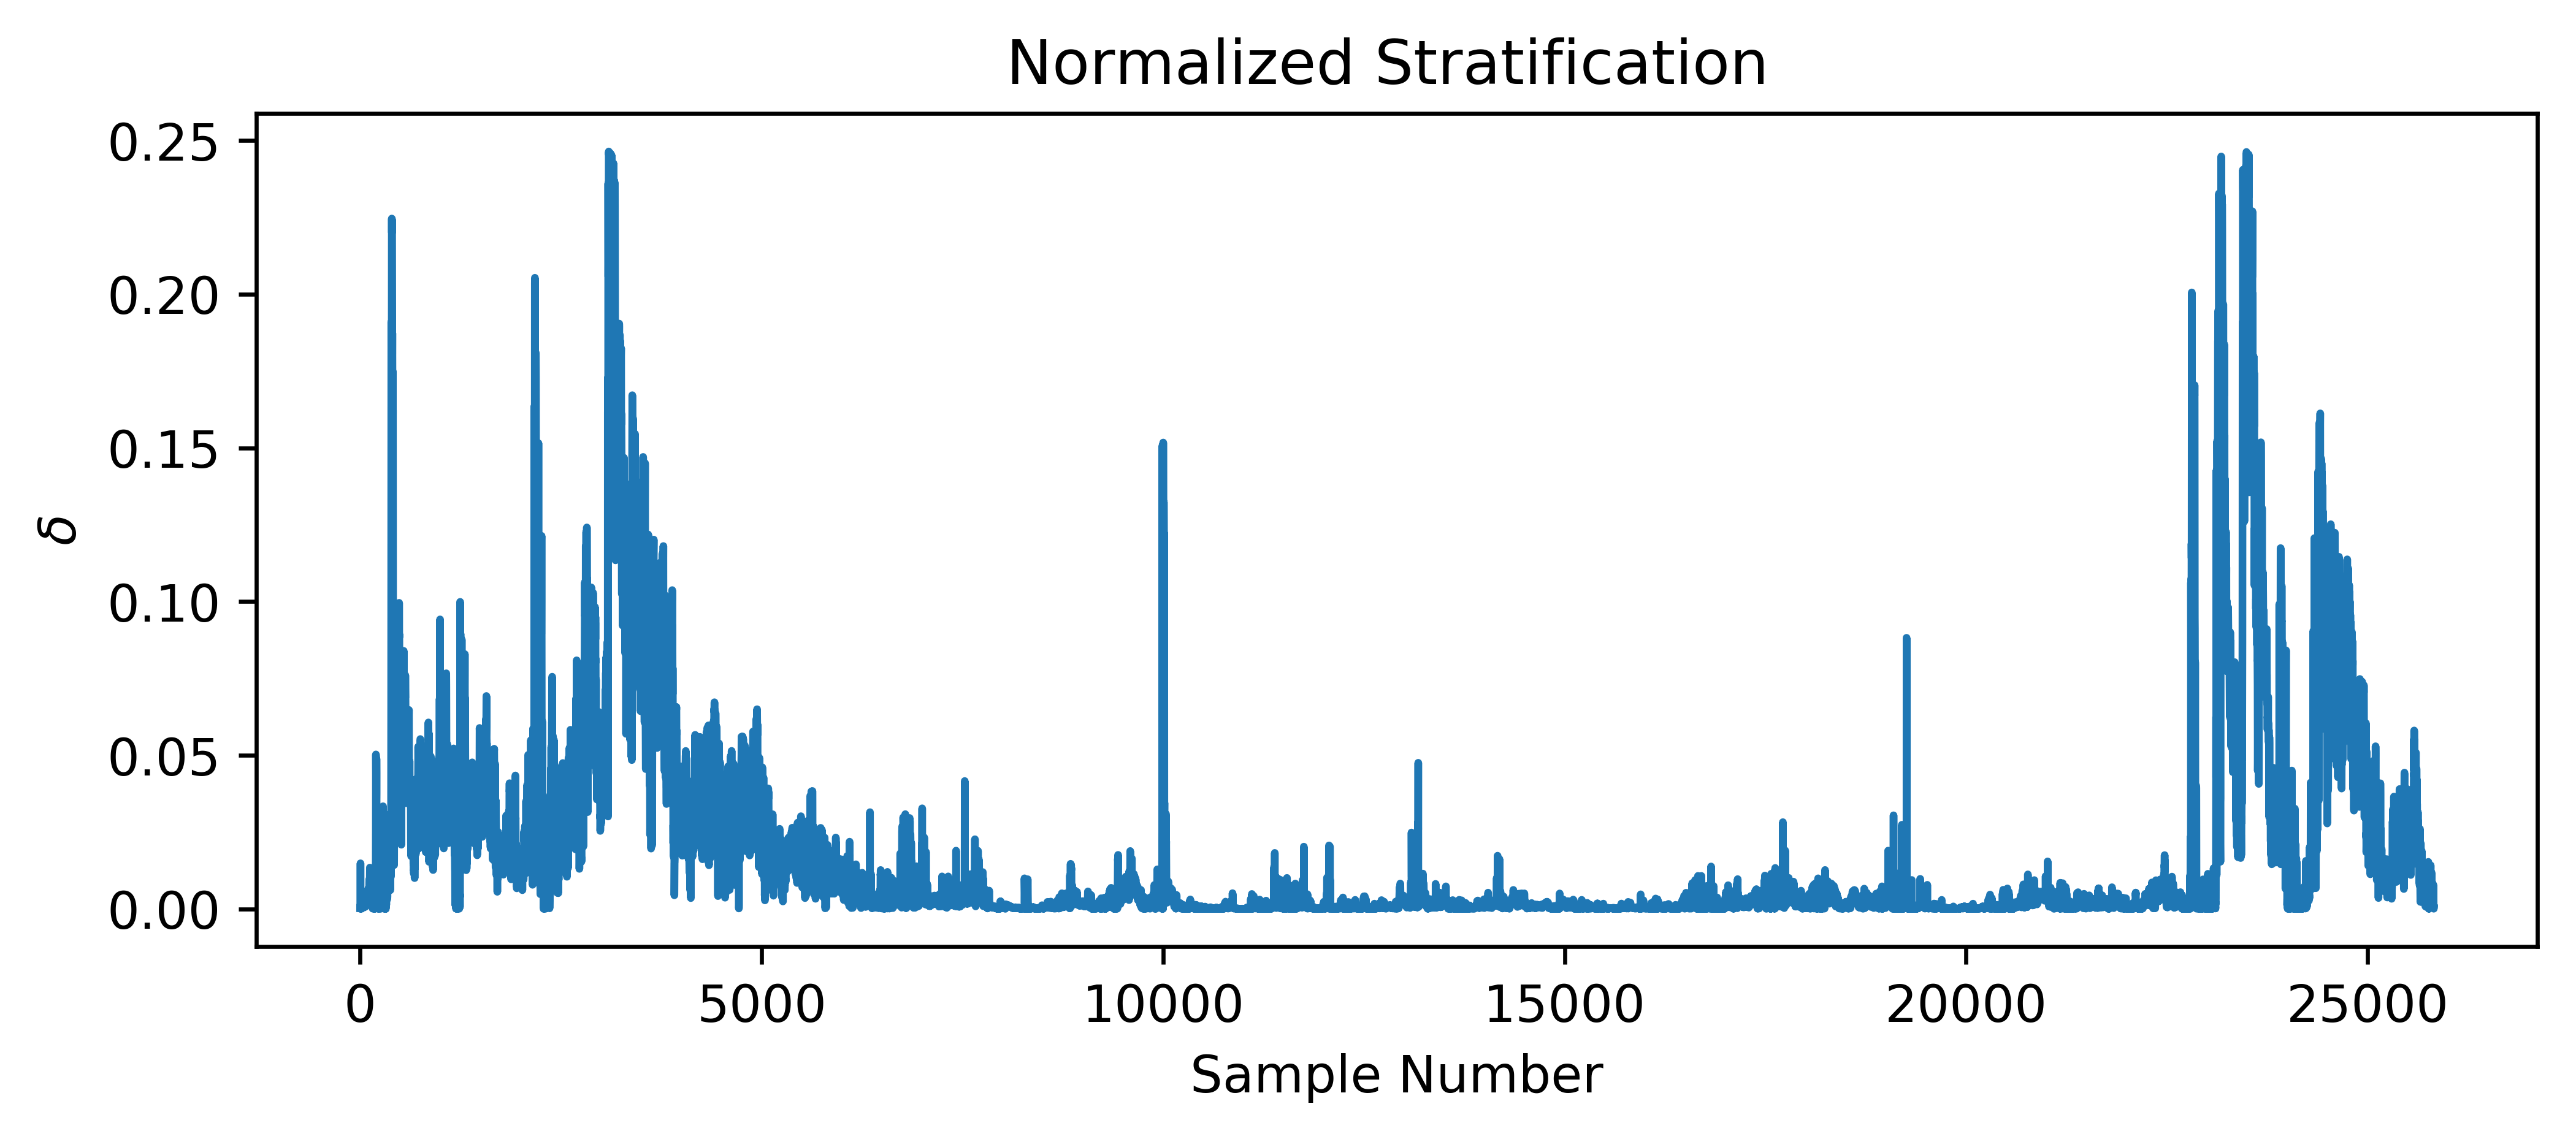

In [81]:
delta = (1-sigma)**2
fig = plt.figure(figsize=(8,3),dpi=600)
plt.plot(delta)
plt.xlabel('Sample Number')
plt.ylabel('$\delta$')
plt.title('Normalized Stratification ')

Text(0.5,1,'Normalized Stratification vs Longitudnal Salinity Gradient ')

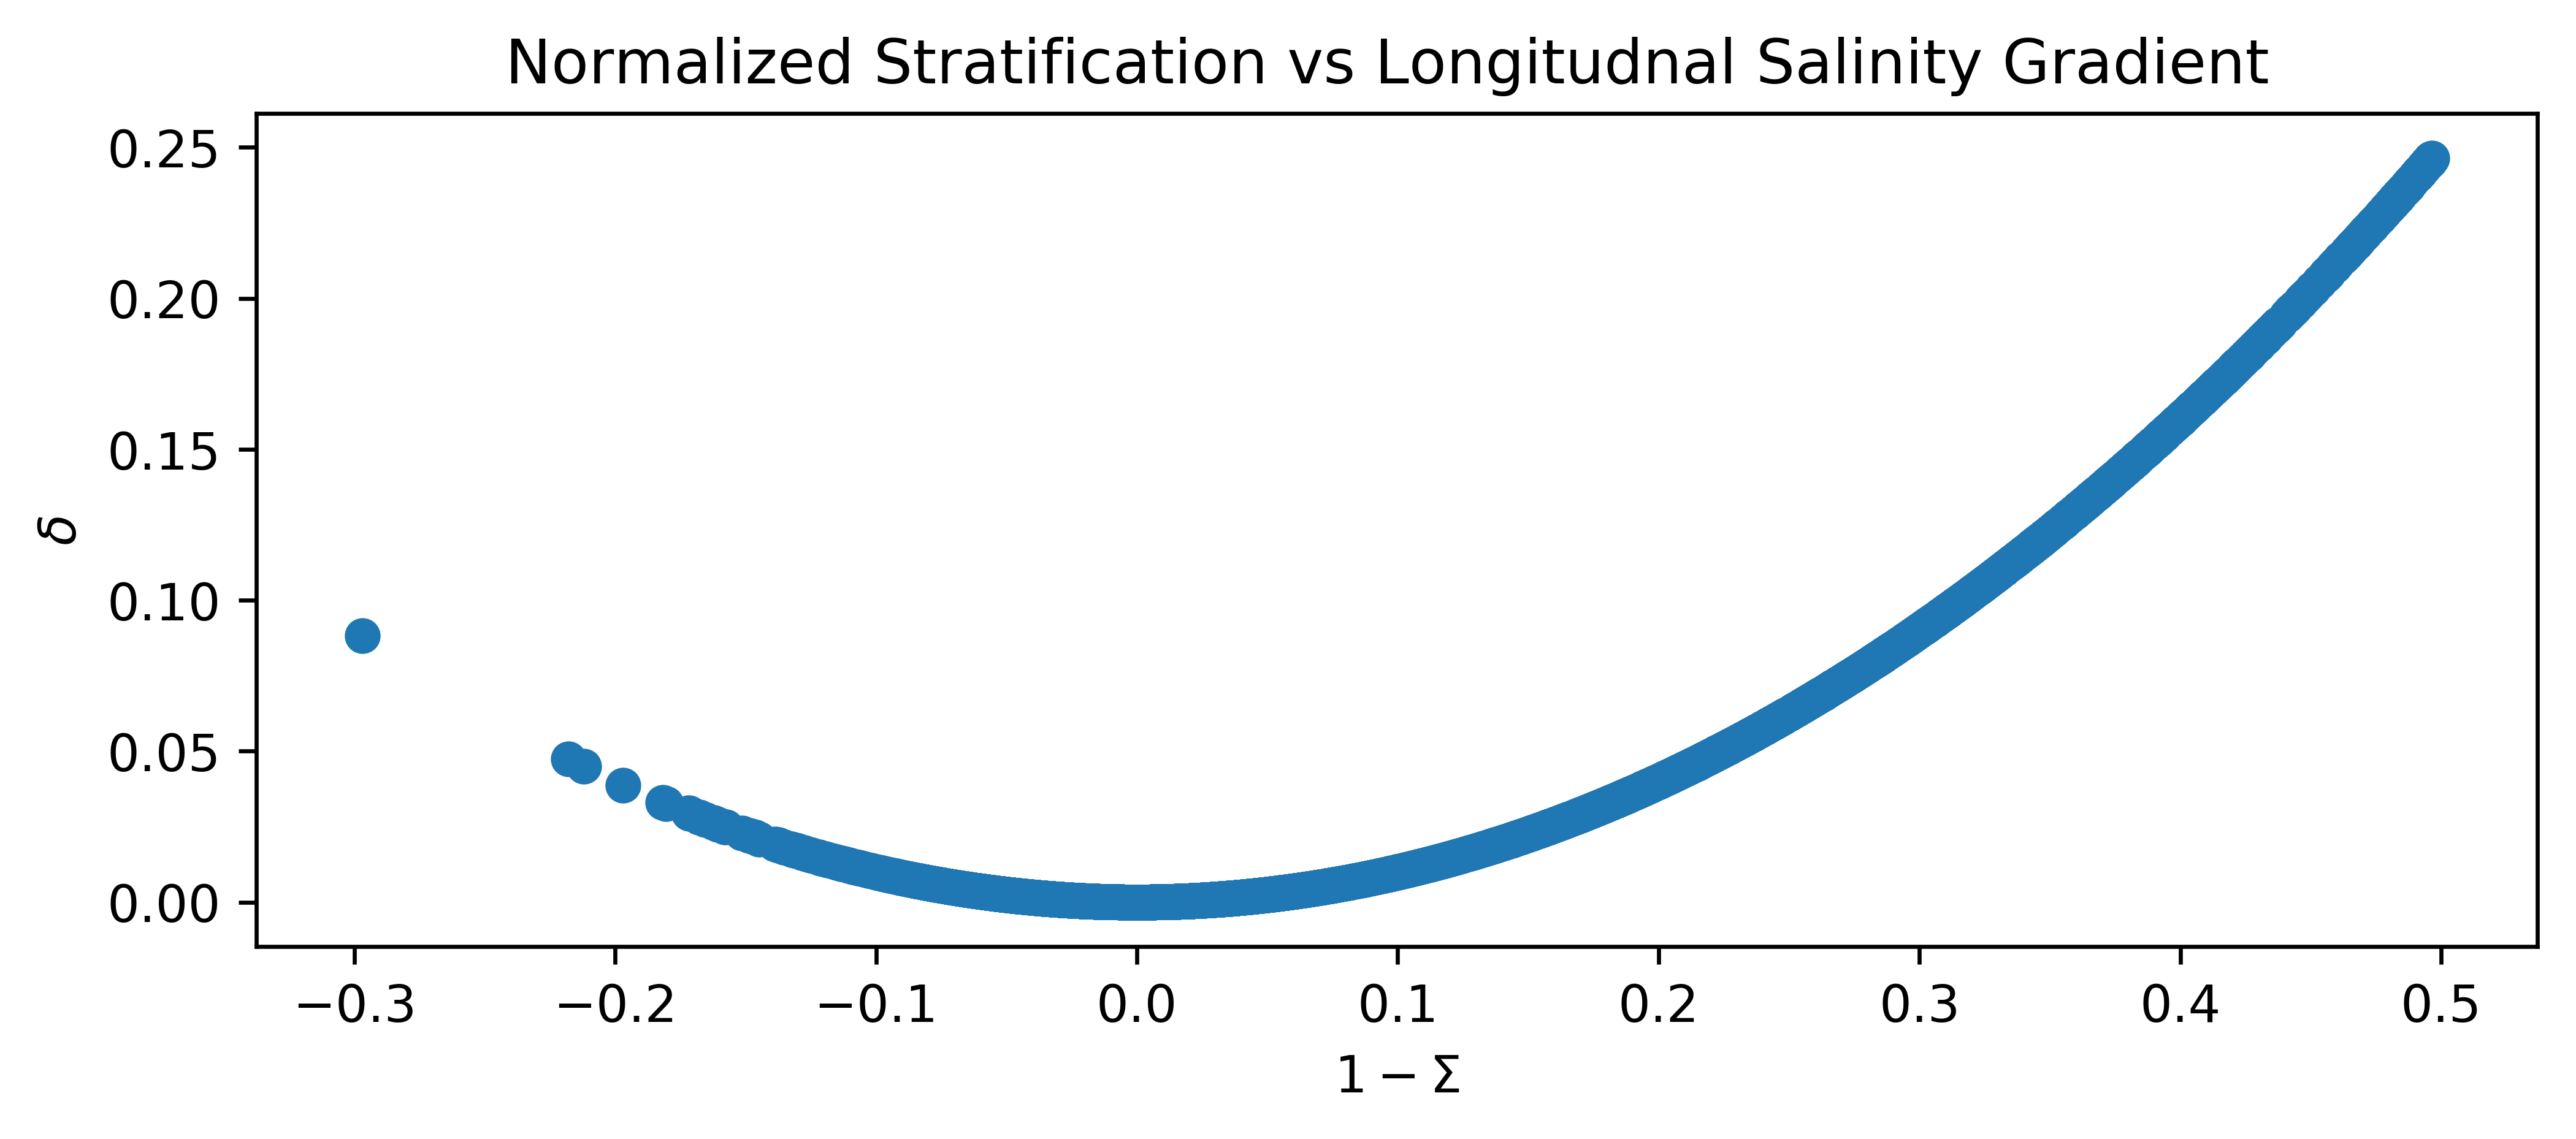

In [5]:
fig = plt.figure(figsize=(8,3),dpi=600)

plt.scatter((1-sigma),delta)
plt.xlabel(r'$1-\Sigma$')
plt.ylabel('$\delta$')
plt.title('Normalized Stratification vs Longitudnal Salinity Gradient ')

In [121]:
df1 = pd.read_csv('/home/dylan/Forcing_Mechanisms/Total River Discharge Data Final.csv', index_col=0, parse_dates=True)
qr = df1['ComFlow']['2010-1-5':'2015-12-1']
qr = qr[~qr.index.duplicated()] 
qr = qr.resample('120min').asfreq()
qr = qr[6:25832]

Text(0.5,1,'Hydraulic Flushing Time')

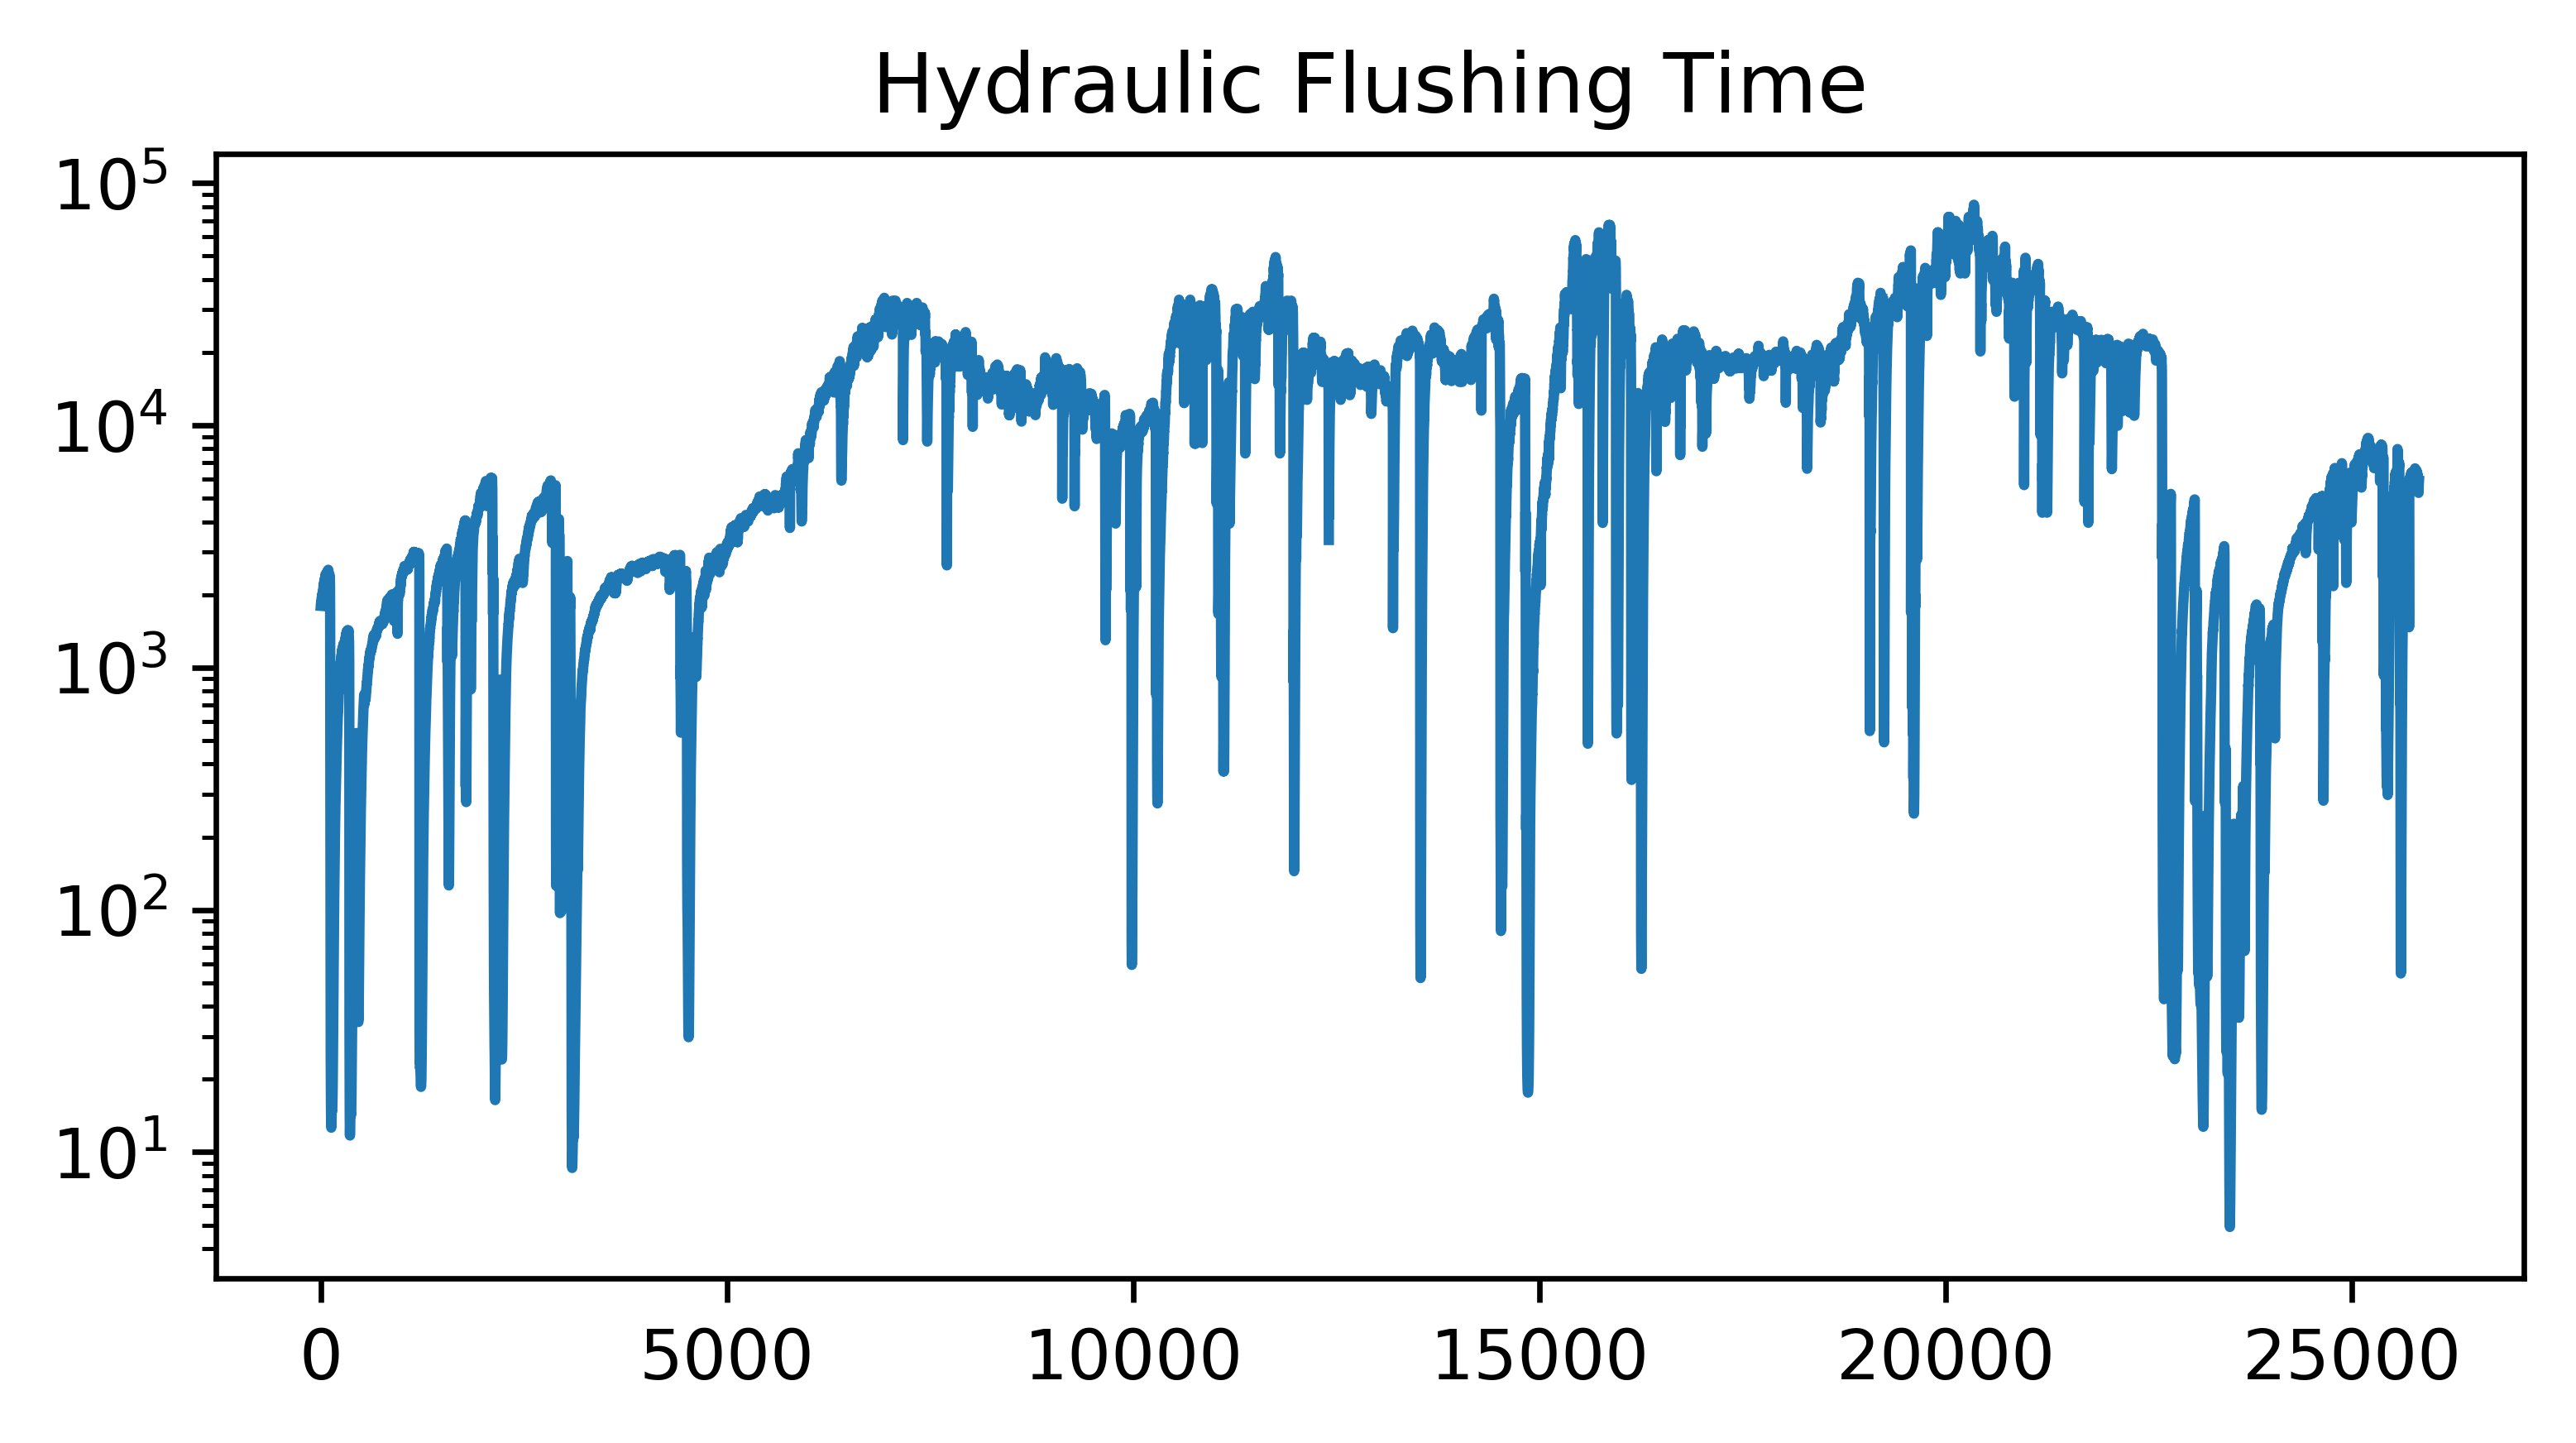

In [122]:
volume = 179344868.03118977
tauh = (volume/qr)/86400

fig = plt.figure(figsize=(6,3),dpi=600)
ax = plt.subplot(111)
plt.semilogy(np.array(tauh))
plt.title('Hydraulic Flushing Time')


In [123]:
len(tauh)

25826

Text(0,0.5,'$\\tau_{adj}$')

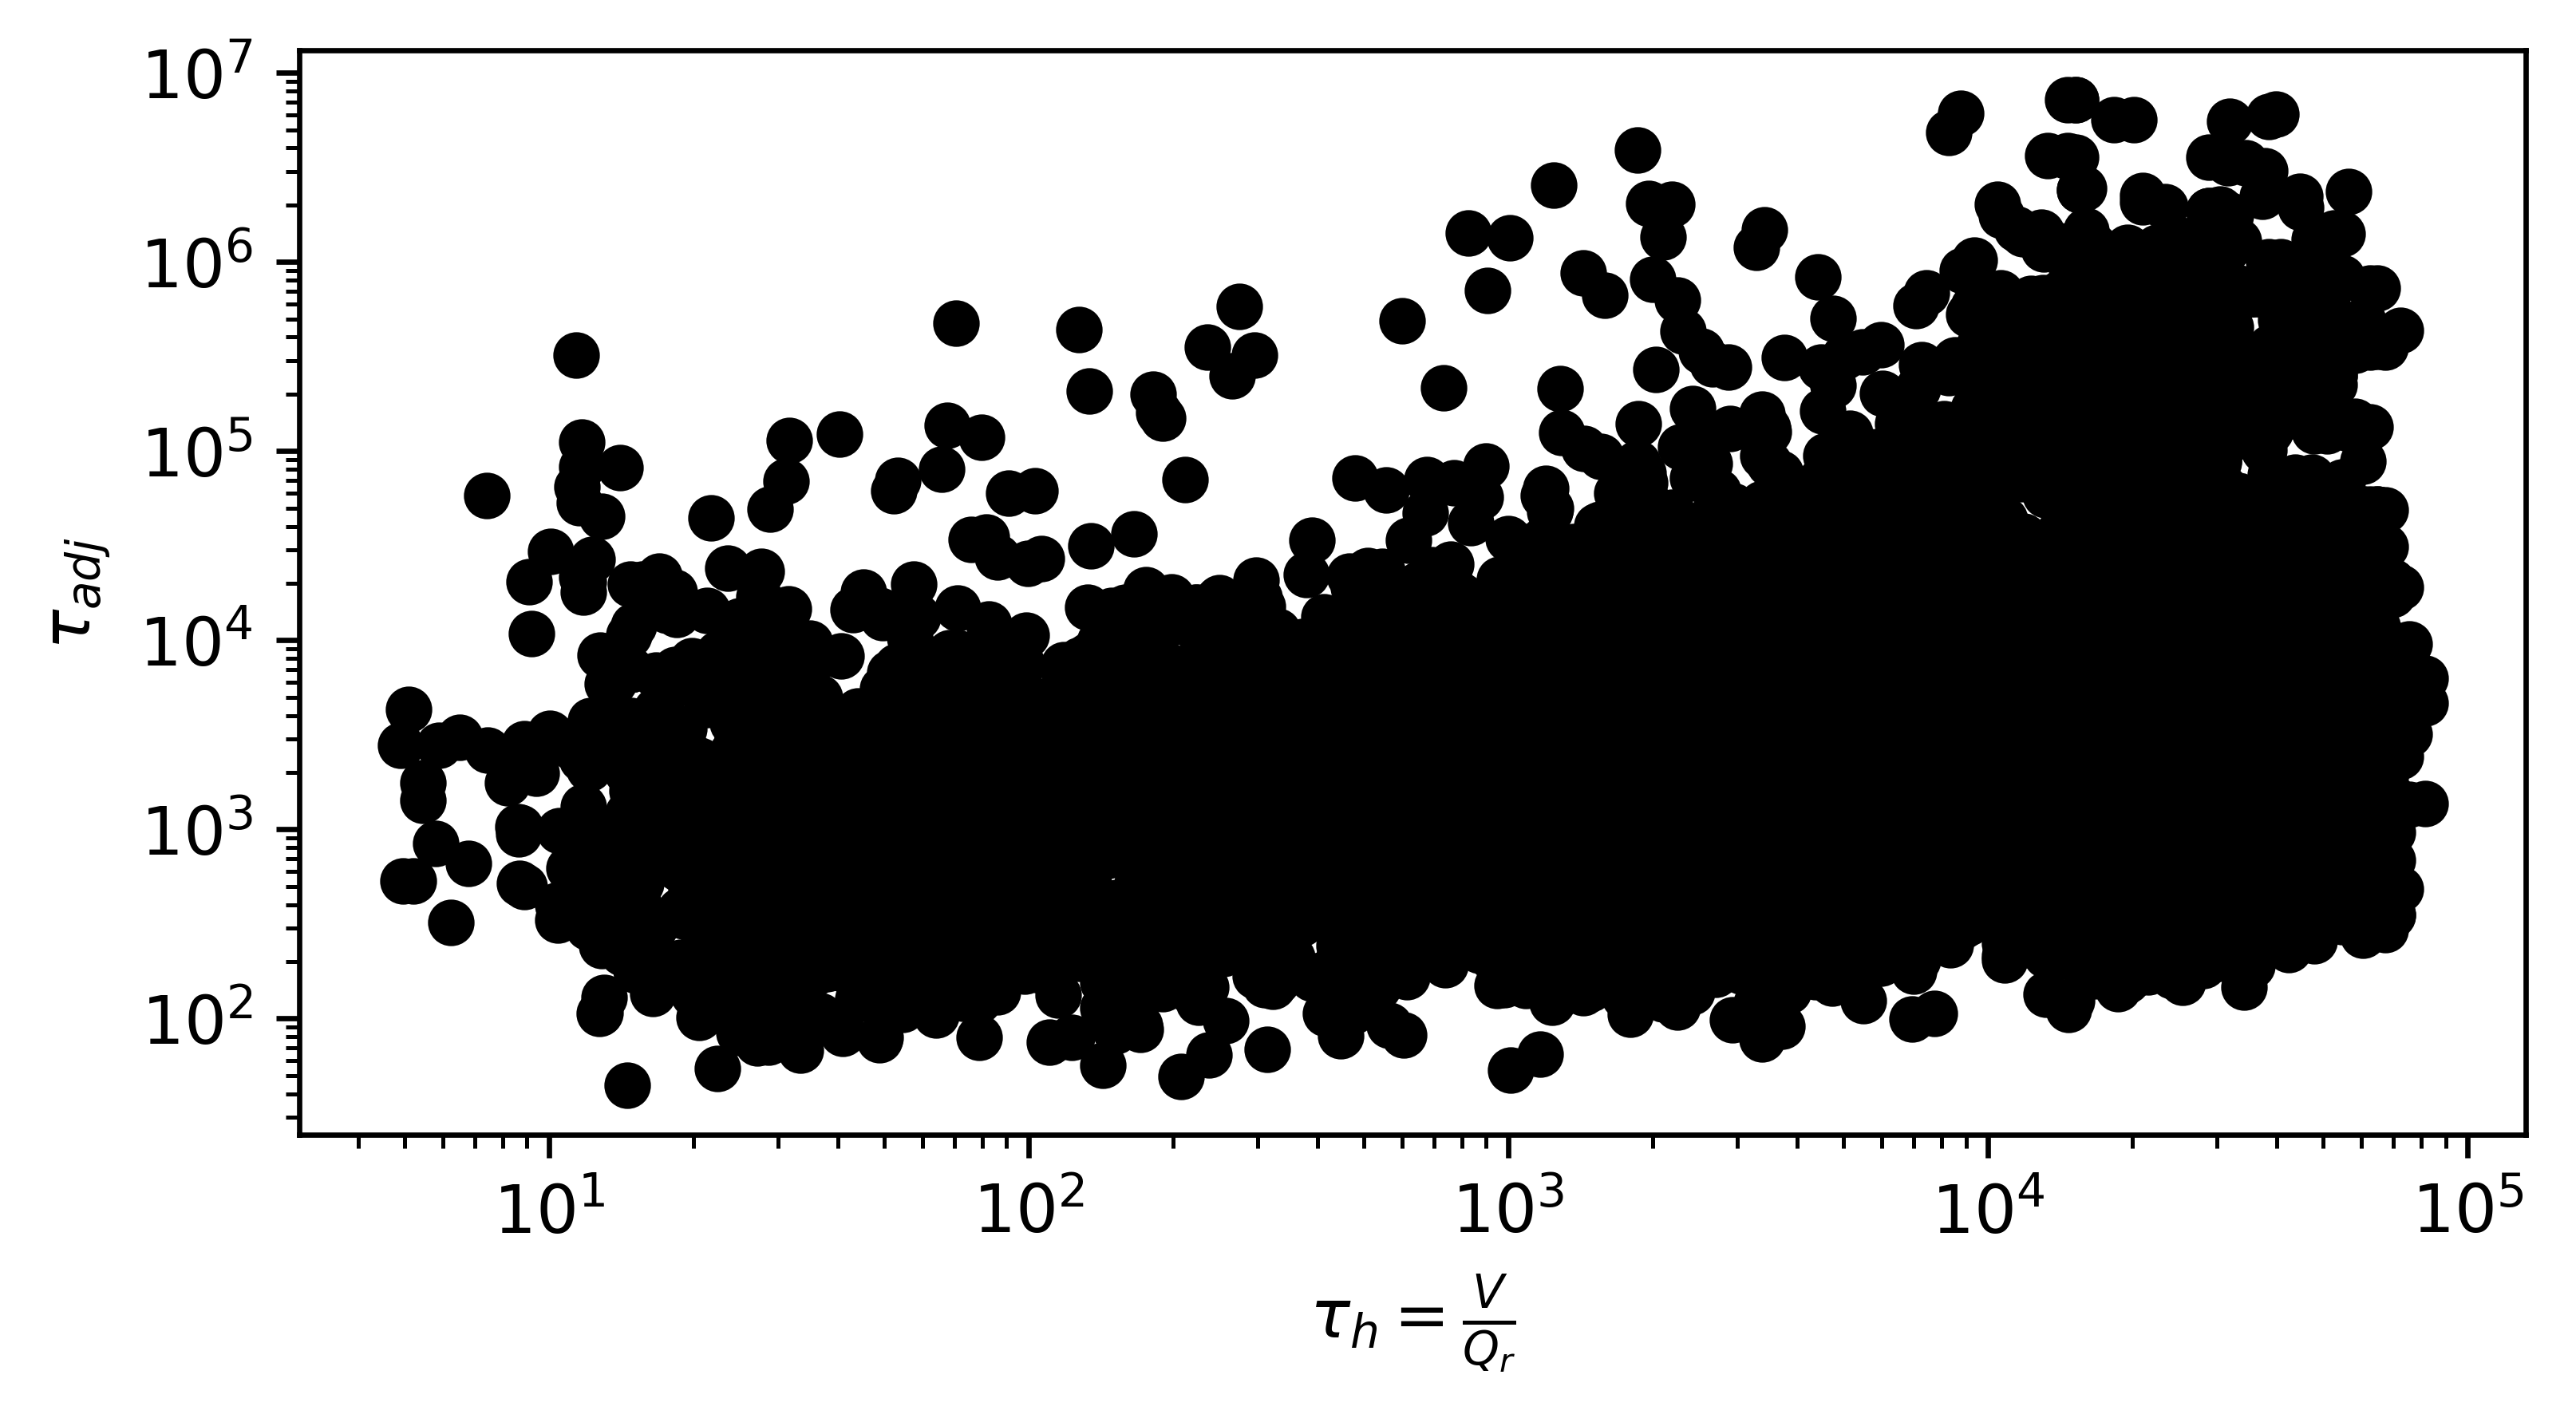

In [124]:
fig = plt.figure(figsize=(6,3),dpi=600)
ax = plt.subplot(111)
ax.scatter(tauh[:25826],Tau, color = 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\tau_h = \frac{V}{Q_r}$')
ax.set_ylabel(r'$\tau_{adj}$')

Text(0.5,1,'Normalized Salinity vs River Discharge')

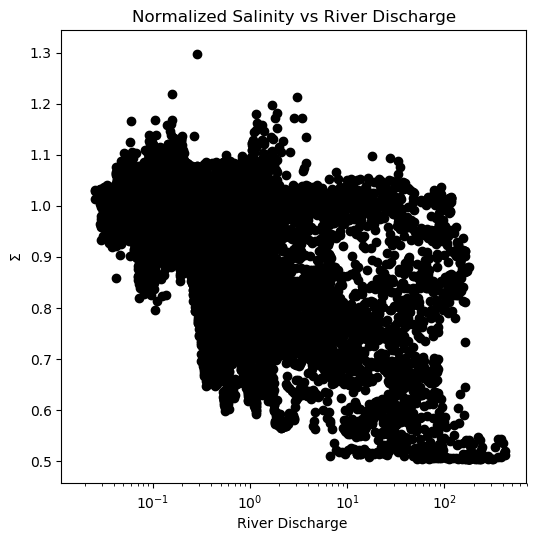

Text(0.5,1,'Normalized Salinity vs River Discharge')

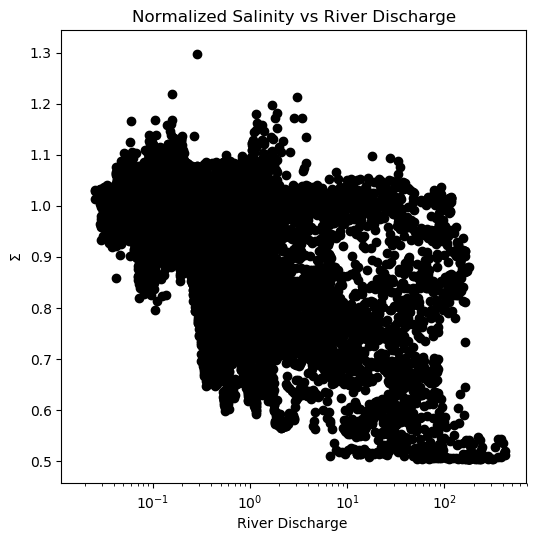

In [153]:

fig = plt.figure(figsize=(6,6),dpi=100)
ax = plt.subplot(111)
plt.scatter(qr, sigma, color = 'k')
plt.xlabel('River Discharge ')
plt.ylabel('$\Sigma$')
ax.set_xscale('log')
plt.title('Normalized Salinity vs River Discharge')



In [159]:
np.correlate(sigma,qr)

array([nan])

In [161]:
sigma

array([0.98666667, 0.96710526, 1.00357143, ..., 0.97142857, 0.99404762,
       0.98255814])